<a href="https://colab.research.google.com/github/atoothman/DATA-70500/blob/main/FindingUsingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding and Using Data

In this notebook, we're going to focus on data search tools and code for reading in data once you've found useful datasets.

We've seen some of this code before. We're going to be creating DataFrame data objects and creating graphs from the data we find. What's new is identifying the format of the data file and using that to select the right method for reading the data into a DataFrame object for analysis.

In [ ]:
!pip install pyreadr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
# Code block 1: importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import polars as po
import pyreadr


## Harvard Dataverse

Harvard University maintains a free data archive. The URL is: https://dataverse.harvard.edu/

There are lots of files for replicating particular studies in this archive.

Let's look at an example. Here's the dataset: https://doi.org/10.7910/DVN/DVSWOR

The file we'll read is in Rdata format. We'll need to install a library to read this format first, and then we'll read the data into a DataFrame.

I downloaded the file from Dataverse and uploaded it to my Google Drive. You can learn more about how to use your Google Drive with Colab in this notebook: https://colab.research.google.com/notebooks/io.ipynb

In [ ]:
# I'm reading the file I downloaded from my Google Drive.

Harvard_data = pyreadr.read_r('/content/drive/MyDrive/Data/JD_replication_data.RData')

print(Harvard_data.keys())

odict_keys(['jd.df'])


The library we installed creates a Python dictionary from the original RData file. By printing the keys of the dictionary, we can determine the data we want to read into a DataFrame. In this case, the name of the DataFrame we want is "jd.df", so we use pandas to assign the object to a DataFrame with a name of our choosing.

In [ ]:
Harvard_df = Harvard_data['jd.df']
Harvard_df.head()

,state,state_name,state_no,year,circuit,judicial_decision_aele,restrictive_aele,restrictive_count_aele,status_quo,police_shoot_fe,...,restrictive_count_aele_diff,status_quo_diff,police_shoot_fe_diff,homicide_rate_ucr_diff,property_crime_rate_ucr_diff,total_arrests_rate_ucr_diff,unemp_rate_ukcpr_diff,poverty_rate_ukcpr_diff,population_ukcpr_log_diff,pctnonwhite_cspp_diff
0,AL,Alabama,1,2000,11,0.0,0.0,0.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,Alabama,1,2001,11,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,2.0,0.600229,-67.309944,40.015933,0.5,2.6,0.003467,0.0
2,AL,Alabama,1,2002,11,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,-0.317177,-31.182883,1.002678,0.8,-1.4,0.002784,0.0
3,AL,Alabama,1,2003,11,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,3.0,-0.320197,-27.517400,-5.584430,0.1,0.5,0.005210,0.0
4,AL,Alabama,1,2004,11,1.0,0.0,0.0,0.0,13.0,...,0.0,0.0,1.0,-0.052679,-18.708332,2.448445,-0.3,1.9,0.006030,0.0


## Kaggle
To use Kaggle, you need to create an account, but the accounts are free.

The URL is https://www.kaggle.com/

I did a search for "global social indicators."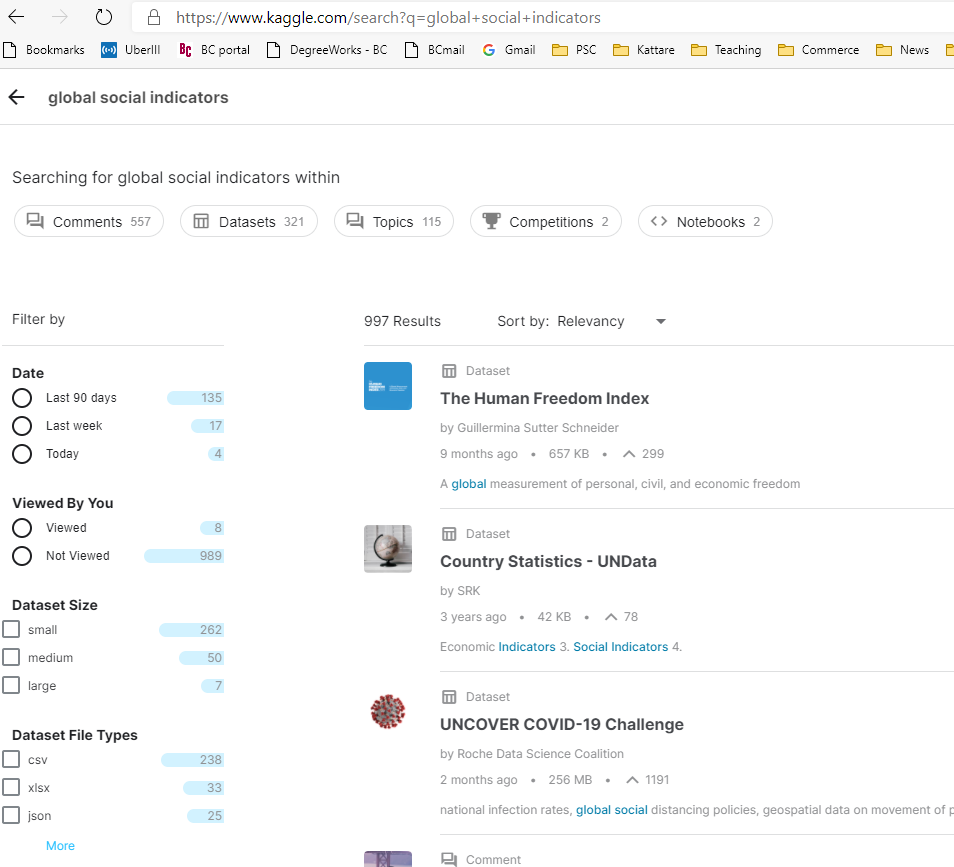

You can specify particular formats and data licenses to limit your search. Comma delimited files (**.csv, or comma separated values**, **.xls/xlsx, or Excel**, and **json** are all common formats and we have tools available to read in data in these formats.

In some instances, you can read in the data online with the URL and in others you can download the data and read a file from your computer, or Google Drive.

## Google Dataset Search

I performed a data search using [Google's Dataset search engine](https://datasetsearch.research.google.com/), using "global social indicators" as a search term.

When I found an interesting item, I followed the URL to the site hosting the data and explored the formats available.







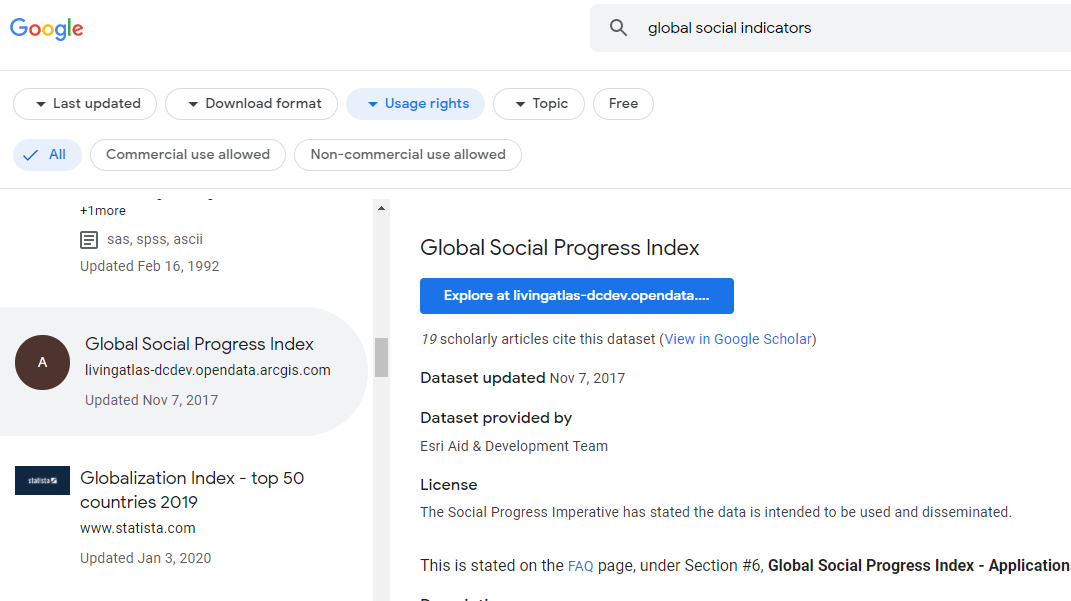

I wanted to access the data online rather than download it, so I chose the geojason format. I copied the URL.

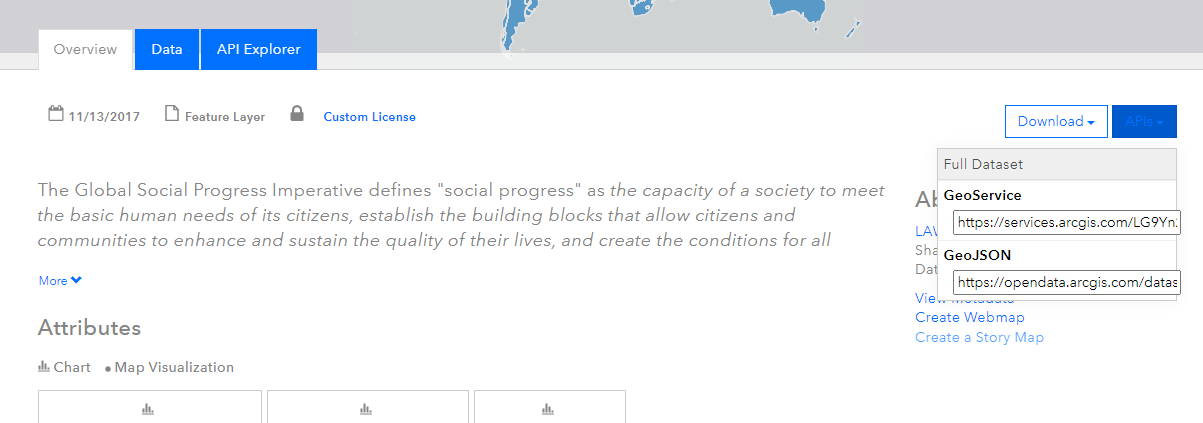

Because the first data source I found was a geotagged json format, I need to install a package in Python before I can use the correct method for reading in the data.

In [ ]:
# Code block 2a: installing a new package
!pip install geopandas
import geopandas as gpd

In [ ]:
# Code block 2b: reading the data into a new data object
GlobalSocialProgress = gpd.read_file('https://opendata.arcgis.com/datasets/8603e3d21a834639b3543d6455ee73b9_0.geojson')
GlobalSocialProgress.head()

,OBJECTID,ISO3_CODE,C_Name,Country,Country_Code,Year,Social_Progress_Index,Basic_Human_Needs,Foundations_of_Wellbeing,Opportunity,...,Secondary_school_enrol_capped,Gender_parity_in_sec_enrol_dif,Mobile_telephone_subs_capped,Greenhouse_gas_emiss_capped,Globally_ranked_univ_bucketed,Perc_tert_stu_rnk_univ_bucket,Year_Date,Shape__Area,Shape__Length,geometry
0,1,JPN,Senkaku Islands,Japan,JPN,2014,84.90,95.63,86.42,72.63,...,100.000000,0.00401,100.000000,301.266998,9,3.0,2014-01-01 12:00:00+00:00,6.035459e+06,1.304976e+04,"MULTIPOLYGON (((123.54568 25.76805, 123.51862 ..."
1,2,JEY,Jersey,Jersey,JEY,2014,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0.0,2014-01-01 12:00:00+00:00,2.827182e+08,9.206573e+04,"POLYGON ((-2.15425 49.26506, -2.14293 49.25785..."
2,3,HKG,Hong Kong,Hong Kong,HKG,2014,NaN,NaN,NaN,NaN,...,100.000000,0.02916,100.000000,NaN,5,4.0,2014-01-01 12:00:00+00:00,1.256626e+09,6.927430e+05,"MULTIPOLYGON (((113.90674 22.15719, 113.89953 ..."
3,4,HND,Honduras,Honduras,HND,2014,59.90,65.55,69.10,45.05,...,70.663101,0.20543,92.870171,564.068237,0,0.0,2014-01-01 12:00:00+00:00,1.213516e+11,2.788149e+06,"MULTIPOLYGON (((-87.63335 13.28654, -87.61576 ..."
4,5,HRV,Croatia,Croatia,HRV,2014,75.89,91.12,78.38,58.16,...,100.000000,0.03498,100.000000,272.504944,1,4.0,2014-01-01 12:00:00+00:00,1.132997e+11,7.965979e+06,"MULTIPOLYGON (((16.25840 42.39972, 16.28310 42..."


This dataset has a stardard variable for identifying cases--in this case, countries. We can use it to combine with data from other sources that also identify countries with the same standard. We'll see more examples of this in our next lesson.

The next file I found on Kaggle was only available as a download. The file format was **.csv** so I downloaded a copy and put the file into my Google Drive in the Colab directory.

In [ ]:
# Code block 2c: delimited files
HumanFreedomIndex = pd.read_csv('/content/drive/My Drive/Colab Notebooks/hfi_cc_2019.csv')
HumanFreedomIndex.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,...,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,...,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54,2,-,-,-,...,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27


Both of these data objects have an identical variable to indicate country, the ISO code. So we can use this to combine the DataFrames so that our analysis can use variables from both datasets.

To combine the DataFrames, we use the **merge()** method in pandas. We'll talk in more detail about merging data sources in our next lesson.


In [ ]:
# Code block 2d: merging data files

WorldIndicators = pd.merge(left=GlobalSocialProgress, right=HumanFreedomIndex, left_on='ISO3_CODE', right_on='ISO_code')
WorldIndicators.head()

,OBJECTID,ISO3_CODE,C_Name,Country,Country_Code,Year,Social_Progress_Index,Basic_Human_Needs,Foundations_of_Wellbeing,Opportunity,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,1,JPN,Senkaku Islands,Japan,JPN,2014,84.9,95.63,86.42,72.63,...,4.6,9.3,9.6,7.4,8.1,8.5,7.9,8.3,7.86,17
1,1,JPN,Senkaku Islands,Japan,JPN,2014,84.9,95.63,86.42,72.63,...,4.3,9.6,9.5,7.4,7.7,8.3,7.8,8.2,7.83,19
2,1,JPN,Senkaku Islands,Japan,JPN,2014,84.9,95.63,86.42,72.63,...,4.3,9.3,9.6,7.6,7.7,8,7.8,8.2,7.85,16
3,1,JPN,Senkaku Islands,Japan,JPN,2014,84.9,95.63,86.42,72.63,...,4.3,9.1,9.6,7.8,7.7,6.3,7.5,7.8,7.75,25
4,1,JPN,Senkaku Islands,Japan,JPN,2014,84.9,95.63,86.42,72.63,...,4.2,9.1,9.6,8.4,7.7,6.3,7.6,8,7.77,17


Now we have a data source in the **json** format. To read in these data, we need the **read_json** method from the **pandas** library.

In [ ]:
# Code block 2e: reading in json formatted data
UScovid = pd.read_json('https://api.covidtracking.com/v1/states/daily.json')
UScovid.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


The next kind of data format we want to use is the Excel spreadsheet. I found a data source on Kaggle and downloaded the Excel file to my Google Drive.

In [ ]:
# Code block 2f: Excel files

CountryIncome = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Income by Country.xlsx', na_values=[np.nan])
CountryIncome.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.466,0.44,0.431,0.376,0.328,0.381,0.366,0.354,0.343,...,0.409,0.426,0.421,0.435,0.438,0.436,0.435,0.434,0.434,0.432
1,Albania,0.572,0.521,0.506,0.526,0.541,0.563,0.578,0.561,0.576,...,0.686,0.693,0.699,0.7,0.705,0.707,0.711,0.717,0.721,0.727
2,Algeria,0.695,0.687,0.687,0.683,0.677,0.678,0.681,0.681,0.688,...,0.731,0.735,0.734,0.734,0.735,0.737,0.739,0.745,0.743,0.743
3,Andorra,0.936,0.934,0.929,0.923,0.922,0.923,0.929,0.942,0.947,...,0.924,0.916,0.91,0.91,0.914,0.92,0.924,0.928,0.931,0.935
4,Angola,0.562,0.576,0.431,0.428,0.388,0.506,0.505,0.53,0.527,...,0.615,0.614,0.613,0.622,0.626,0.63,0.629,0.62,0.617,0.607


BONUS CODE BLOCK! We'll mainly use pandas for data management, but I want to introduce polars as well. Polars is faster for very large datasets. That won't be a factor for us in this introductory course, but it is good to have in mind in applied settings.

In [ ]:
# Code block 2g: Polars instead of pandas for data management

!pip install xlsx2csv
CountryIncome2 = po.read_excel('/content/drive/My Drive/Colab Notebooks/Income by Country.xlsx', read_csv_options={"null_values": '..'})
CountryIncome2.head()

Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Afghanistan""",0.466,0.44,0.431,0.376,0.328,0.381,0.366,0.354,0.343,0.331,0.317,0.302,0.37,0.372,0.366,0.375,0.381,0.394,0.394,0.409,0.426,0.421,0.435,0.438,0.436,0.435,0.434,0.434,0.432
"""Albania""",0.572,0.521,0.506,0.526,0.541,0.563,0.578,0.561,0.576,0.595,0.607,0.621,0.627,0.637,0.645,0.653,0.664,0.674,0.683,0.686,0.693,0.699,0.7,0.705,0.707,0.711,0.717,0.721,0.727
"""Algeria""",0.695,0.687,0.687,0.683,0.677,0.678,0.681,0.681,0.688,0.689,0.691,0.698,0.702,0.711,0.714,0.718,0.72,0.728,0.731,0.731,0.735,0.734,0.734,0.735,0.737,0.739,0.745,0.743,0.743
"""Andorra""",0.936,0.934,0.929,0.923,0.922,0.923,0.929,0.942,0.947,0.953,0.92,0.922,0.926,0.937,0.942,0.947,0.95,0.947,0.931,0.924,0.916,0.91,0.91,0.914,0.92,0.924,0.928,0.931,0.935
"""Angola""",0.562,0.576,0.431,0.428,0.388,0.506,0.505,0.53,0.527,0.511,0.518,0.527,0.554,0.554,0.562,0.576,0.583,0.601,0.604,0.615,0.614,0.613,0.622,0.626,0.63,0.629,0.62,0.617,0.607


Once we've read in data, we can proceed with our analysis, as before. Here's an example of a visualization using the **barplot()** method in seaborn.

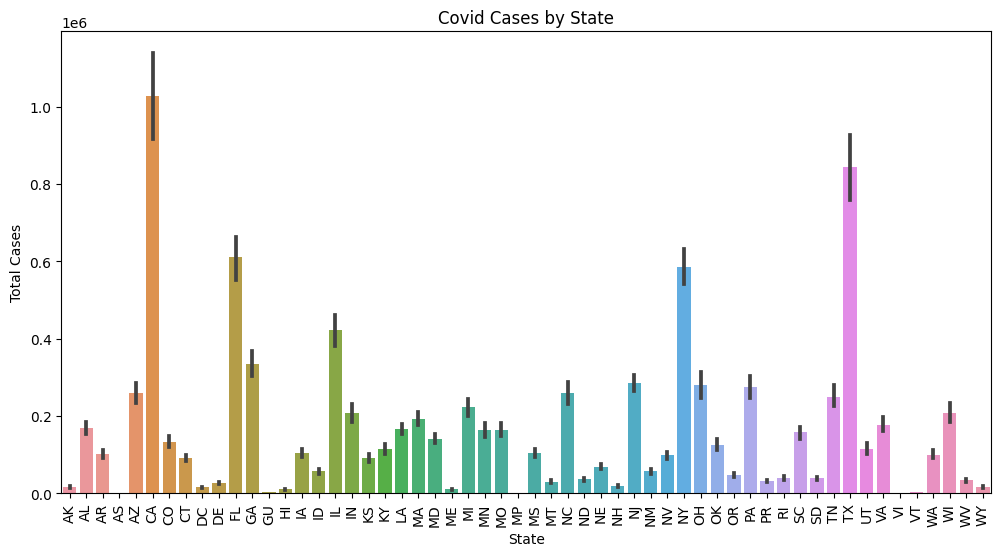

In [ ]:
# Code block 3: Creating a visualization
plt.figure(figsize=(12,6)) # These measurements are in inches.
sb.barplot(x='state', y='positive', data=UScovid)
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Covid Cases by State')
plt.xticks(rotation=90)
plt.show()
plt.


## Text as Data

There are now lots of useful tools for handling text as data in Python, and as with other forms of open data that we'll consider, there are lots of good options for data sources. We'll look more closely at some of these sources and tools later in the semester, but it is worth looking at some of the basics of data acquisition and management now.

(In my current work, I investigate identity formation in public discourse, including mass media and social networks.)



In [ ]:
# Code block 4a: text as data

# We'll need to install a couple of libraries in Colab. You may not need to do this
# if you are working in your own IDE, such as Visual Studio.
!pip install boilerpy3
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.5 MB/s eta 0:00:00


In [ ]:
# Code block 4b: libraries for text processing

# We'll need some libraries for text as data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from boilerpy3 import extractors
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
import sklearn
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
import re
import contractions
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords, twitter_samples
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, TweetTokenizer, RegexpTokenizer
from nltk.util import ngrams
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn

The data source is Project Gutenberg, an online library.

https://www.gutenberg.org/ebooks/bookshelf/52

Here, I am looking at books about mythology.

In [ ]:
# Code block 4c: Scraping text

# In this block, I use the extractor method from the boilerpy3 library to scrape
# and parse HTML.

URLs = set([
    'https://www.gutenberg.org/cache/epub/16653/pg16653-images.html',
    'https://www.gutenberg.org/cache/epub/15250/pg15250-images.html',
    'https://www.gutenberg.org/cache/epub/22381/pg22381-images.html'
])

books = {}

for URL in URLs:
    try:
        extractor = extractors.ArticleExtractor()
        books[URL] = str(extractor.get_content_from_url(URL)).replace('\n', ' ')

    except:
        print("Can not open URL.")

In [ ]:
# Code block 4d: cleaning and chunking text data

punctuation = string.punctuation
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
corpus = []
sentences2 = []

# This is a quick function to do some basic cleaning tasks
def clean_text(text):
    for character in string.punctuation:
        text = text.replace(character, '')
    text = text.lower()
    text = contractions.fix(text)
    text_token_list = [word for word in text.split(' ') if word not in stopwords]
    text_token_list = [lemmatizer.lemmatize(word) for word in text_token_list]
    text = ' '.join(text_token_list)
    return text

# Here, we create a data object, a corpus, using tools from NLTK
for book in books.keys():
    sentences = nltk.sent_tokenize(books[book])
    for term in sentences:
        words = nltk.word_tokenize(clean_text(term))
        sentence = ' '.join(words)
        #print(sentence)
        corpus.append(sentence)
    corpus.extend(corpus)

print(len(corpus))


33502


In [ ]:
# Code block 4e: processing text data

vectorizer = CountVectorizer(
    min_df=0.001,
    max_df=0.99,
    stop_words='english',
    ngram_range=(1,1)
    )

gutenberg_tm = vectorizer.fit_transform(corpus)

# tf_feature_names tells us what word each column in the matrix represents
#feature_names = vectorizer.get_feature_names()
gutenberg_feature_names = vectorizer.get_feature_names_out()

In [ ]:
# We'll create a document term-matrix for analysis
gutenberg_dtm = pd.DataFrame(gutenberg_tm.todense(), columns=gutenberg_feature_names)
gutenberg_dtm.head()

,ancient,apollo,beautiful,body,brother,called,came,ch,child,chinese,...,water,went,wife,woman,world,worship,year,young,youth,zeus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Here, we'll drop tokens that occur only once and those that are related to the archive format
tokens_present = np.where(gutenberg_dtm.max() > 1 , True, False)
tokenslimited_df = gutenberg_dtm.loc[:, tokens_present]
gutenberg = ["gutenberg", "copyright", "electronic", "archive", "terms", "ebook", "ascii", "disclaimer", "page"]
for term in gutenberg:
    tokenslimited_df = tokenslimited_df.drop(columns=[i for i in list(tokenslimited_df.columns) if term in i])
tokenslimited_df

,age,ancient,babylonia,babylonian,belief,bird,body,brother,called,came,...,way,wife,wind,woman,work,world,worship,year,yü,zeus
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33500,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# This is the input data for the multidimensional scaling
tokens_cofreq = tokenslimited_df.T.dot(tokenslimited_df)
tokens_dist = 1 / (tokens_cofreq + 1)
tokens_dist  # distance matrix

,age,ancient,babylonia,babylonian,belief,bird,body,brother,called,came,...,way,wife,wind,woman,work,world,worship,year,yü,zeus
age,0.002208,0.030303,0.030303,0.058824,0.333333,1.000000,1.000000,0.111111,0.028571,0.043478,...,0.200000,0.076923,1.000000,0.090909,1.000000,0.111111,0.200000,0.037037,1.000000,0.333333
ancient,0.030303,0.000743,0.005917,0.007752,0.030303,0.047619,0.090909,0.333333,0.037037,0.027027,...,0.111111,0.111111,1.000000,0.017544,0.034483,0.013333,0.016949,0.023256,0.111111,0.066667
babylonia,0.030303,0.005917,0.001200,0.024390,0.020408,0.058824,1.000000,1.000000,1.000000,0.111111,...,0.111111,0.111111,1.000000,0.040000,0.111111,1.000000,0.040000,0.058824,1.000000,1.000000
babylonian,0.058824,0.007752,0.024390,0.001072,0.040000,0.040000,1.000000,1.000000,0.058824,0.058824,...,0.111111,0.040000,0.024390,0.040000,0.111111,0.024390,0.058824,0.040000,1.000000,1.000000
belief,0.333333,0.030303,0.020408,0.040000,0.002387,1.000000,1.000000,1.000000,0.090909,0.142857,...,1.000000,1.000000,0.076923,0.076923,1.000000,0.200000,0.090909,0.333333,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world,0.111111,0.013333,1.000000,0.024390,0.200000,0.200000,0.076923,0.090909,0.028571,0.040000,...,0.111111,0.047619,0.142857,0.066667,0.076923,0.001376,0.047619,0.037037,0.200000,0.052632
worship,0.200000,0.016949,0.040000,0.058824,0.090909,1.000000,1.000000,1.000000,0.090909,0.028571,...,0.032258,1.000000,1.000000,0.034483,0.200000,0.047619,0.001100,0.047619,1.000000,0.111111
year,0.037037,0.023256,0.058824,0.040000,0.333333,1.000000,0.090909,0.090909,0.034483,0.090909,...,0.076923,0.090909,1.000000,0.090909,0.200000,0.037037,0.047619,0.001127,0.058824,0.030303
yü,1.000000,0.111111,1.000000,1.000000,1.000000,0.111111,0.200000,0.200000,0.034483,0.076923,...,0.111111,1.000000,0.076923,1.000000,1.000000,0.200000,1.000000,0.058824,0.002309,1.000000


In [ ]:
# Code block 4f: analyzing text data

# Multidimensional Scaling is a way to characterize the pattern of co-occurrences.
# We can plot the results, and items that co-occur more frequently will appear
# closer together in the plot.
mds = MDS(metric=False, n_components = 2, random_state=0, dissimilarity='precomputed')
tokens_transform = mds.fit_transform(tokens_dist)
print(mds.stress_)

317.16828297124107


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


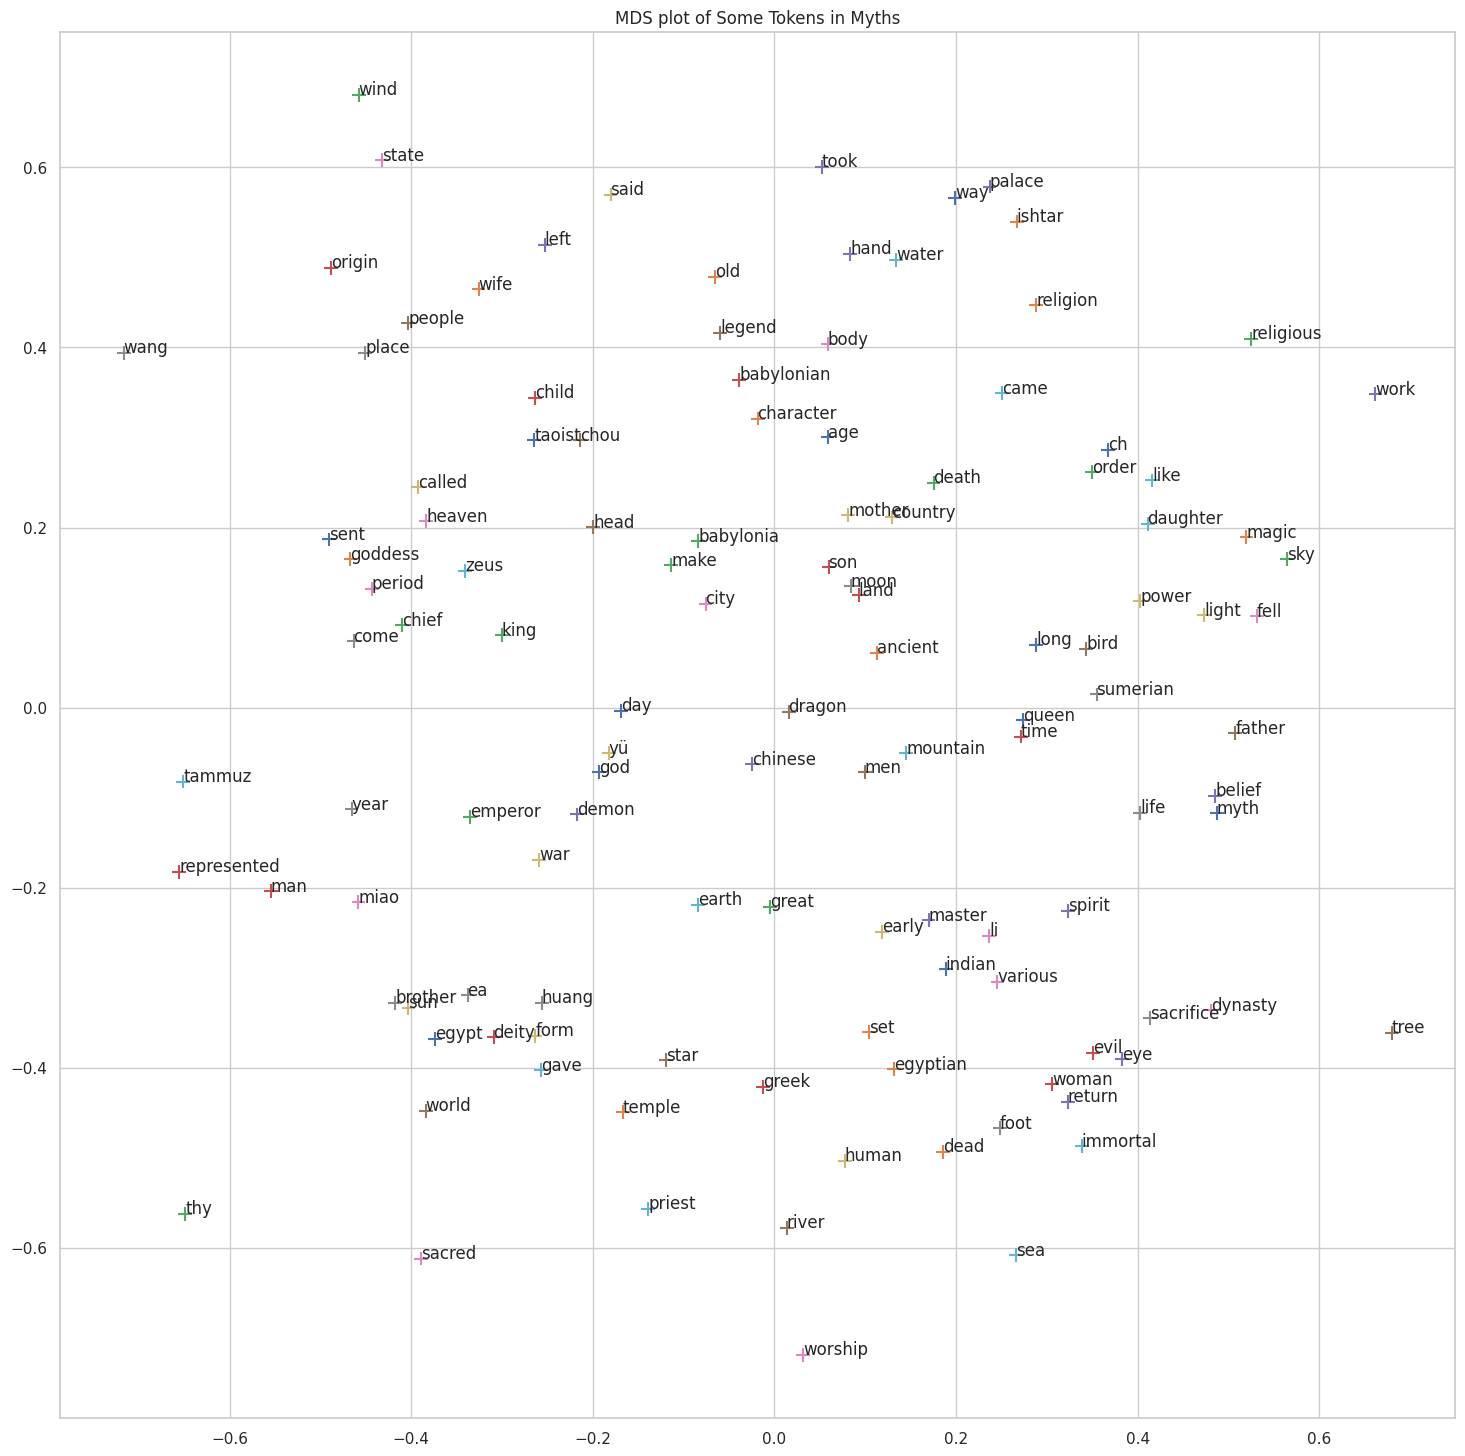

In [ ]:
# Code block 4g: visualizing text data

# Finally, we can visualize the co-occurrences of tokens in the data
sb.set_theme(style="whitegrid")
fig = plt.figure(figsize=(18,18))
i = 0
while i < len(tokenslimited_df.columns):
    plt.scatter(tokens_transform[i,0], tokens_transform[i,1], sizes=(100, 100), marker='+')
    plt.text(tokens_transform[i,0], tokens_transform[i,1], tokenslimited_df.columns[i])
    i += 1
plt.title('MDS plot of Some Tokens in Myths')
plt.show()

## Activity
1. Use a data search tool to find an interesting, publicly available data source. Identify the format of the data from the API.
2. Read in the data into a new DataFrame object.
3. Create a visualization of at least one variable from the DataFrame using the Seaborn library.
4. Briefly interpret the visualization.